In [57]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import random as rnd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
%matplotlib inline 
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('ChurnData.csv')
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [59]:
missing_data = df.isnull()
missing_data.head(15)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [61]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [91]:
df.mean()

tenure       35.505000
age          41.165000
address      11.650000
income       75.130000
ed            2.825000
employ       10.225000
equip         0.425000
callcard      0.705000
wireless      0.290000
longmon      11.789250
tollmon      13.240000
equipmon     15.783250
cardmon      14.358750
wiremon      12.217000
longten     577.770750
tollten     507.007500
cardten     650.663750
voice         0.295000
pager         0.275000
internet      0.440000
callwait      0.455000
confer        0.460000
ebill         0.440000
loglong       2.193285
logtoll       3.229185
lninc         3.951015
custcat       2.475000
churn         0.290000
dtype: float64

In [95]:
df.reset_index(drop=True, inplace=True)

In [96]:
x = df['income'].values
y = df['employ'].values

In [97]:
x = x.reshape(-1, 1)

In [98]:
poly = PolynomialFeatures(degree=9)

In [99]:
x_poly = poly.fit_transform(x)

In [100]:
poly.fit(x_poly, y)

PolynomialFeatures(degree=9)

In [101]:
linreg = LinearRegression()

In [102]:
linreg.fit(x_poly, y)

LinearRegression()

In [103]:
y_pred = linreg.predict(x_poly)

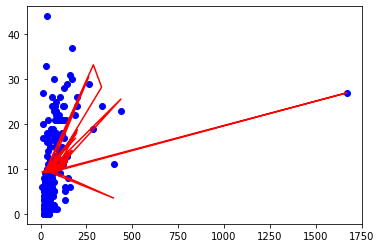

In [104]:
plt.scatter(x,y, color='blue')
plt.plot(x, y_pred, color='red')

In [119]:
x = df.drop('income', axis = 'columns')
y = df.drop('employ', axis = 'columns')
print('shape of x', x.shape)
print('shape of y', y.shape)

shape of x (200, 27)
shape of y (200, 27)


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 51)

In [121]:
print("shape of x_train", x_train)
print("shape of y_train", y_train)
print("shape of x_test", x_test)
print("shape of y_test", y_test)

shape of x_train [[ 140.]
 [  19.]
 [  28.]
 [  25.]
 [  38.]
 [ 263.]
 [  23.]
 [  67.]
 [  55.]
 [  63.]
 [  19.]
 [  46.]
 [ 108.]
 [  58.]
 [  33.]
 [  25.]
 [  46.]
 [  34.]
 [ 171.]
 [ 144.]
 [  33.]
 [  48.]
 [  59.]
 [  58.]
 [  42.]
 [  19.]
 [  48.]
 [ 161.]
 [  55.]
 [  28.]
 [ 127.]
 [  26.]
 [ 117.]
 [  25.]
 [  89.]
 [  27.]
 [  33.]
 [  66.]
 [  22.]
 [  26.]
 [  20.]
 [  18.]
 [  57.]
 [  41.]
 [  36.]
 [  36.]
 [  72.]
 [  69.]
 [  30.]
 [  17.]
 [ 119.]
 [  39.]
 [ 117.]
 [  18.]
 [  38.]
 [  66.]
 [  82.]
 [  44.]
 [  82.]
 [  37.]
 [  50.]
 [ 147.]
 [  68.]
 [ 135.]
 [  55.]
 [  27.]
 [  39.]
 [  45.]
 [  80.]
 [ 120.]
 [ 129.]
 [  40.]
 [ 117.]
 [  42.]
 [  34.]
 [ 107.]
 [ 398.]
 [  82.]
 [ 136.]
 [  52.]
 [ 333.]
 [   9.]
 [1668.]
 [  42.]
 [  45.]
 [  21.]
 [  88.]
 [ 123.]
 [  25.]
 [  23.]
 [  61.]
 [  28.]
 [ 102.]
 [  64.]
 [  24.]
 [  14.]
 [  72.]
 [ 101.]
 [  41.]
 [  33.]
 [  41.]
 [  65.]
 [  24.]
 [  14.]
 [  35.]
 [  45.]
 [  36.]
 [  76.]
 [  96.]
 [

In [122]:
lr = LinearRegression()

In [123]:
lr.fit(X_train, Y_train)

LinearRegression()

In [124]:
lr.coef_

array([[ 1.00000000e+00, -4.73296695e-16, -3.26526337e-16,
        -1.78880661e-15,  4.42495953e-16,  1.76384593e-16,
        -1.12821947e-14,  3.28787889e-15,  4.08024236e-15,
        -6.22981119e-16,  1.52359504e-16,  3.59222271e-16,
         2.03462625e-16, -4.83261828e-16, -8.71867944e-17,
         3.80522696e-16,  1.33542976e-16,  3.91248997e-16,
        -2.21808606e-16,  8.70945780e-15,  1.24711075e-15,
        -3.01756780e-15, -2.49901088e-14, -3.00777214e-15,
        -3.05172356e-16,  5.47032368e-15,  5.40859327e-15],
       [-5.50904548e-15,  1.00000000e+00, -1.16404192e-16,
         5.57747467e-14,  2.29014481e-16,  1.20010912e-13,
        -5.14534536e-14, -3.37663380e-14, -2.54249710e-14,
         5.94740269e-15, -4.44182284e-15,  4.00181823e-15,
         1.90924898e-15,  2.29382111e-16, -4.05528895e-16,
         3.18606212e-16,  7.04436031e-16,  1.10988853e-15,
         7.62956299e-16,  3.44736366e-15, -5.16520293e-17,
        -1.41501775e-15, -1.14595301e-14, -7.86312673e-

In [125]:
m = 3.93
c = 50.44
y = m * 12 + c
y

97.6

In [127]:
y_pred = lr.predict(X_test)
y_pred

array([[ 2.40000000e+01,  2.50000000e+01,  3.00000000e+00, ...,
         3.33200000e+00,  2.00000000e+00, -1.64418648e-14],
       [ 1.20000000e+01,  2.30000000e+01,  2.00000000e+00, ...,
         3.17800000e+00,  4.00000000e+00, -7.67823837e-15],
       [ 7.00000000e+00,  3.50000000e+01,  1.40000000e+01, ...,
         4.38200000e+00,  3.00000000e+00,  2.13585388e-16],
       ...,
       [ 6.90000000e+01,  5.10000000e+01,  1.10000000e+01, ...,
         6.08200000e+00,  4.00000000e+00, -2.88074839e-15],
       [ 2.50000000e+01,  3.00000000e+01, -8.53341236e-15, ...,
         2.99600000e+00,  3.00000000e+00,  6.95711808e-15],
       [ 5.00000000e+01,  5.20000000e+01,  1.70000000e+01, ...,
         3.58400000e+00,  4.00000000e+00, -2.26213203e-14]])

In [132]:
#pd.DataFrame(np.c_[X_test, Y_test, y_pred], columns=['income', 'employ', 'income_prediction'])

In [131]:
#lr.score(X_testn Y_test)

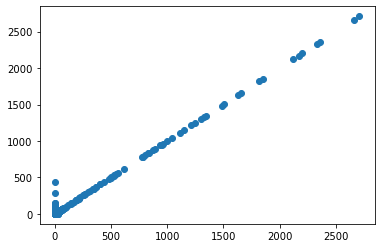

In [133]:
plt.scatter(X_test, Y_test)

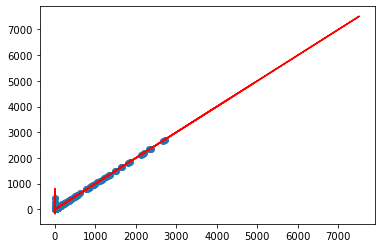

In [134]:
plt.scatter(X_test, Y_test)
plt.plot(X_train, lr.predict(X_train), color='red')